<a href="https://colab.research.google.com/github/gracieleo/programaria-analise-dados/blob/master/regressao_linear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regressão linear :🖥️
 É um algoritmo supervisionado de machine learning usado para estimar o valor de algo baseado em uma série de outros dados históricos, portanto olhando para o passado você pode “prever” o futuro.

### Feature Engineering 🪓

In [1]:
import pandas as pd

In [2]:
dados = pd.read_excel('/content/drive/MyDrive/Manuais_Estudos/Dados/programaria/analise_dados_mod7.xlsx')

In [3]:
dados.columns

Index(['ID', 'IDADE', 'FAIXA IDADE', 'GENERO', 'COR/RACA/ETNIA', 'PCD',
       'EXPERIENCIA_PROFISSIONAL_PREJUDICADA', 'ASPECTOS_PREJUDICADOS',
       'VIVE_NO_BRASIL', 'ESTADO ONDE MORA', 'UF ONDE MORA',
       'REGIAO ONDE MORA', 'MUDOU DE ESTADO?', 'REGIAO DE ORIGEM',
       'NIVEL DE ENSINO', 'ÁREA DE FORMAÇÃO',
       'QUAL SUA SITUAÇÃO ATUAL DE TRABALHO?', 'SETOR',
       'NUMERO DE FUNCIONARIOS', 'GESTOR?', 'CARGO COMO GESTOR', 'CARGO ATUAL',
       'FAIXA SALARIAL',
       'QUANTO TEMPO DE EXPERIÊNCIA NA ÁREA DE DADOS VOCÊ TEM?',
       'QUANTO TEMPO DE EXPERIÊNCIA NA ÁREA DE TI/ENGENHARIA DE SOFTWARE VOCÊ TEVE ANTES DE COMEÇAR A TRABALHAR NA ÁREA DE DADOS?',
       'SALARIO', 'NOVO_NIVEL', 'NIVEL_Júnior', 'NIVEL_Pleno', 'NIVEL_Sênior',
       'GEARACAO', 'Quanto tempo de experiência na área de dados você tem?',
       'Quanto tempo de experiência na área de TI/Engenharia de Software você teve antes de começar a trabalhar na área de dados?',
       'Você está satisfeito na sua 

In [4]:
dados['QUAL SUA SITUAÇÃO ATUAL DE TRABALHO?'].value_counts()

,count
QUAL SUA SITUAÇÃO ATUAL DE TRABALHO?,
Empregado (CLT),2762
Empreendedor ou Empregado (CNPJ),410
"Desempregado, buscando recolocação",350
Estagiário,188
Servidor Público,156
Trabalho na área Acadêmica/Pesquisador,86
Somente Estudante (graduação),82
Vivo no Brasil e trabalho remoto para empresa de fora do Brasil,69
Vivo fora do Brasil e trabalho para empresa de fora do Brasil,46


In [5]:
# Filtro por tipo de trabalho = Empregado (CLT)
dados = dados[dados['QUAL SUA SITUAÇÃO ATUAL DE TRABALHO?'] == 'Empregado (CLT)']

In [6]:
dados['COR/RACA/ETNIA'].value_counts()

,count
COR/RACA/ETNIA,
Branca,1805
Parda,661
Preta,181
Amarela,85
Prefiro não informar,16
Outra,10
Indígena,4


In [7]:
# Tirar as categorias com poucos nºs de informação, amostras pequenas (outros| indigenas| prefiro não informar)
lista_retirar = ['Prefiro não informar','Outra','Indígena']

In [8]:
# Filtro ~ retira os valores iguais aos da lista
dados = dados[~dados['COR/RACA/ETNIA'].isin(lista_retirar)]

In [9]:
# Criação de coluna 'Cor não branca'
dados['NAO_BRANCA'] = dados['COR/RACA/ETNIA'].apply(lambda x: 1 if x!= 'Branca' else 0)

In [10]:
# Tempo experiencia na área de dados
dados['QUANTO TEMPO DE EXPERIÊNCIA NA ÁREA DE DADOS VOCÊ TEM?'].value_counts()

,count
QUANTO TEMPO DE EXPERIÊNCIA NA ÁREA DE DADOS VOCÊ TEM?,
de 1 a 2 anos,743
de 3 a 4 anos,584
de 4 a 6 anos,416
Menos de 1 ano,353
Mais de 10 anos,277
de 7 a 10 anos,232
Não tenho experiência na área de dados,127


In [11]:
# Criação coluna 'tempo experiencia' pegando o primeiro valor de anos de cada linha
dados['TEMPO_EXPERIENCIA'] = dados['QUANTO TEMPO DE EXPERIÊNCIA NA ÁREA DE DADOS VOCÊ TEM?'].str.extract(r'(\d+)')

In [12]:
dados['TEMPO_EXPERIENCIA'].value_counts()

,count
TEMPO_EXPERIENCIA,
1,1096
3,584
4,416
10,277
7,232


In [13]:
dados['NUMERO DE FUNCIONARIOS'].value_counts()

,count
NUMERO DE FUNCIONARIOS,
Acima de 3.000,1313
de 101 a 500,503
de 1.001 a 3.000,368
de 501 a 1.000,248
de 51 a 100,146
de 11 a 50,112
de 6 a 10,24
de 1 a 5,18


In [14]:
# Substituir o . por nada
dados['NUMERO DE FUNCIONARIOS'] = dados['NUMERO DE FUNCIONARIOS'].str.replace('.', '')

In [15]:
dados['NUMERO DE FUNCIONARIOS'] = dados['NUMERO DE FUNCIONARIOS'].str.extract(r'(\d+)')

In [18]:
# Verifica se há nulos
dados['NUMERO DE FUNCIONARIOS'].value_counts(dropna=False)

,count
NUMERO DE FUNCIONARIOS,
3000,1313
101,503
1001,368
501,248
51,146
11,112
6,24
1,18


In [19]:
# Verifica se há nulos
dados['TEMPO_EXPERIENCIA'].value_counts(dropna=False)

,count
TEMPO_EXPERIENCIA,
1,1096
3,584
4,416
10,277
7,232
NaN,127


In [20]:
# Preencher valores nulos da coluna 'Não tenho experiência na área de dados' com zero
dados['TEMPO_EXPERIENCIA'] = dados['TEMPO_EXPERIENCIA'].fillna(0)

In [21]:
dados['Qual o principal motivo da sua insatisfação com a empresa atual?'].value_counts()

,count
Qual o principal motivo da sua insatisfação com a empresa atual?,
Gostaria de trabalhar em em outra área de atuação,69
Salário atual não corresponde ao mercado,53
Falta de oportunidade de crescimento no emprego atual,46
Falta de maturidade analítica na empresa,45
"Falta de oportunidade de crescimento no emprego atual, Salário atual não corresponde ao mercado, Falta de maturidade analítica na empresa",26
...,...
"O clima de trabalho/ambiente não é bom, Não tenho uma boa relação com meu líder/gestor, Gostaria de receber mais benefícios",1
Falta de organização nos processos internos,1
"Gostaria de receber mais benefícios, O clima de trabalho/ambiente não é bom, Falta de oportunidade de crescimento no emprego atual",1


In [22]:
# Criação de coluna 'Insatisfação com salario'
dados['INSATISFACAO_SALARIO'] = 0

In [23]:
# Filtro nas linhas da coluna 'Qual o principal motivo da sua insatisfação com a empresa atual?' pesquisando pela palavra 'Salario'
dados.loc[dados['Qual o principal motivo da sua insatisfação com a empresa atual?'].notnull(), 'INSATISFACAO_SALARIO'] = dados.loc[dados['Qual o principal motivo da sua insatisfação com a empresa atual?'].notnull(), 'Qual o principal motivo da sua insatisfação com a empresa atual?'].apply(lambda x: 1 if 'Salário' in x else 0)

In [24]:
dados['INSATISFACAO_SALARIO'].value_counts()

,count
INSATISFACAO_SALARIO,
0,2453
1,279


In [25]:
dados['NIVEL DE ENSINO'].value_counts()

,count
NIVEL DE ENSINO,
Graduação/Bacharelado,1024
Pós-graduação,975
Mestrado,306
Estudante de Graduação,271
Doutorado ou Phd,100
Não tenho graduação formal,52
Prefiro não informar,4


In [26]:
# Atribuindo valores as categorias de ensino, por ordem crescente de escolaridade
dados['NIVEL DE ENSINO'] = dados['NIVEL DE ENSINO'].apply(lambda x:
                               0 if x == 'Não tenho graduação formal'else
                               1 if x == 'Estudante de Graduação' else
                               2 if x == 'Graduação/Bacharelado' else
                               3 if x == 'Pós-graduação' else
                               4 if x == 'Mestrado' else
                               5 if x == 'Doutorado ou Phd' else -1)

In [27]:
# Seleção das colunas que vai utilizar no modelo, serão os atributos
dados = dados[['IDADE','GENERO','NAO_BRANCA','TEMPO_EXPERIENCIA','INSATISFACAO_SALARIO','SETOR','REGIAO ONDE MORA','NIVEL DE ENSINO',
        'NUMERO DE FUNCIONARIOS','SALARIO','NOVO_NIVEL']]

In [28]:
dados.columns

Index(['IDADE', 'GENERO', 'NAO_BRANCA', 'TEMPO_EXPERIENCIA',
       'INSATISFACAO_SALARIO', 'SETOR', 'REGIAO ONDE MORA', 'NIVEL DE ENSINO',
       'NUMERO DE FUNCIONARIOS', 'SALARIO', 'NOVO_NIVEL'],
      dtype='object')

In [29]:
#  usamos o get_dummies aqui pois as categorias não têm uma ordem crescente como em nivel de ensino
dados = pd.get_dummies(dados, columns=['GENERO','SETOR','NOVO_NIVEL','REGIAO ONDE MORA'],drop_first=True)

### Criação do Modelo 🤖
- De teste
- De treinamento

In [30]:
X = dados.drop('SALARIO', axis=1)   #atributos- exclui a coluna salario
y = dados['SALARIO']                #target - nosso objetivo

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
# divisão do modelo para teste e treinamento
# será usadao 0.2 = 20% dos dados para o teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42 )

In [33]:
from sklearn.preprocessing import StandardScaler

In [34]:
# StandardScaler para padronizar as características, normalizar os dados
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)  #atributos de treino normalizados
X_test_scaled = scaler.fit_transform(X_test)

### Treino do Modelo 💪

In [35]:
from sklearn.linear_model import LinearRegression

In [36]:
# cria objeto do modelo
model = LinearRegression()

In [37]:
model.fit(X_train_scaled, y_train)

LinearRegression()

In [38]:
# Predição do conjunto
y_pred = model.predict(X_test_scaled)

### Avaliação de desempenho do modelo | Métricas de validação 📈

In [39]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

**MSE** é apenas o cálculo do erro mas elevamos ao quadrado, não podemos comparar ele com o valor de MAE, pois ele sempre será maior.

In [40]:
# MSE (Mean Squared Error)
# Calculo do erro quadradico médio = diferença entre valor real e valor predito
mse = mean_squared_error(y_test, y_pred)

In [41]:
mse

23048733.978297196

mse, quanto mais proximo de zero melhor, nesse ex. deu um valor muito alto vamos calcular o mae pois seu calculo é linear não usa elevação

**MAE** é a métrica de erro de regressão mais simples de entender. Ele calcula o valor dos resíduos para cada um dos pontos e depois é tirado a média de todos esses resíduos.

In [42]:
#  MAE (Mean Absolute Error)
# erro absoluto médio
mae = mean_absolute_error(y_test, y_pred)

In [43]:
mae

3298.964464206939

O **R²** é uma medida estatística de quão próximos os dados estão da linha de regressão ajustada. <br> 0: indica que o modelo não explica nada da variabilidade dos dados de resposta ao redor de sua média.<br>
1: indica que o modelo explica toda a variabilidade dos dados de resposta ao redor de sua média.

In [44]:
# R² (R-squared)
# erro quadrado
r2 = r2_score(y_test, y_pred)

In [45]:
r2

0.5297347873934934

Para analisar se o modelo está performando bem, precisamos analisar as métricas (**r2, mae, mse**) em conjunto. <br>
Temos variaveis razoaveis, para **mae** é um valor proximo ao real dos salarios já **mse** é muito alto.<br>
Para um modelo real de produção nosso modelo não seria aceitável.

### Gráfico dos valores reais e valores preditos pelo modelo 📊

In [46]:
import matplotlib.pyplot as plt

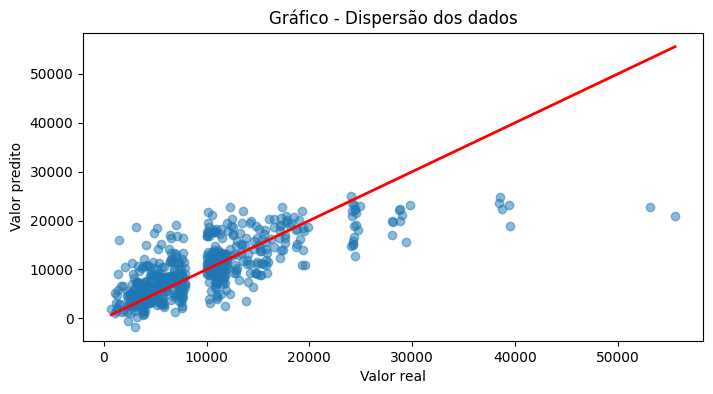

In [47]:
plt.figure(figsize=(8,4))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Valor real')
plt.ylabel('Valor predito')
plt.title('Gráfico - Dispersão dos dados')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2) #cria a reta da regressão, [min,max] e [min,max] significa inicio e fim do ponto
plt.show()

A linha vermelha = representa o modelo de regressão linear, ou seja, os valores preditos <br>
As bolas azuis = representam os valores reais de salario. Pode-se observar que a maioria se concentra na faixa abaixo de 10000 <br>
Ate a faixa de 20000 temos as bolinhas proximas a linha do modelo<br>
Porém para valores muito altos de salários, as predições são muito distantes.


In [48]:
nomes_atributos = X_train.columns

In [49]:
nomes_atributos

Index(['IDADE', 'NAO_BRANCA', 'TEMPO_EXPERIENCIA', 'INSATISFACAO_SALARIO',
       'NIVEL DE ENSINO', 'NUMERO DE FUNCIONARIOS', 'GENERO_Masculino',
       'GENERO_Prefiro não informar', 'SETOR_Educação',
       'SETOR_Entretenimento ou Esportes', 'SETOR_Filantropia/ONG's',
       'SETOR_Finanças ou Bancos', 'SETOR_Indústria',
       'SETOR_Internet/Ecommerce', 'SETOR_Marketing', 'SETOR_Outra Opção',
       'SETOR_Seguros ou Previdência', 'SETOR_Setor Alimentício',
       'SETOR_Setor Automotivo', 'SETOR_Setor Farmaceutico',
       'SETOR_Setor Imobiliário/ Construção Civil', 'SETOR_Setor Público',
       'SETOR_Setor de Energia', 'SETOR_Tecnologia/Fábrica de Software',
       'SETOR_Telecomunicação', 'SETOR_Varejo', 'SETOR_Área da Saúde',
       'SETOR_Área de Consultoria', 'NOVO_NIVEL_Pessoa Gestora',
       'NOVO_NIVEL_Pleno', 'NOVO_NIVEL_Sênior', 'REGIAO ONDE MORA_Nordeste',
       'REGIAO ONDE MORA_Norte', 'REGIAO ONDE MORA_Sudeste',
       'REGIAO ONDE MORA_Sul'],
      dtype='obje

Para analisar melhor o modelo, pegar os coeficientes (pesos) de cada atributo

In [50]:
# criar tabela com pandas
# coeficientes = pesos. Ex na expressão 2a + 7b = 4, 7 é o de peso maior e que mais influencia
coefs = pd.DataFrame(model.coef_, columns=['coeficientes'], index= nomes_atributos)

In [51]:
# ordenar os coeficientes por seu peso (o que mais influencia)
coefs = coefs.sort_values(by='coeficientes', ascending=False)

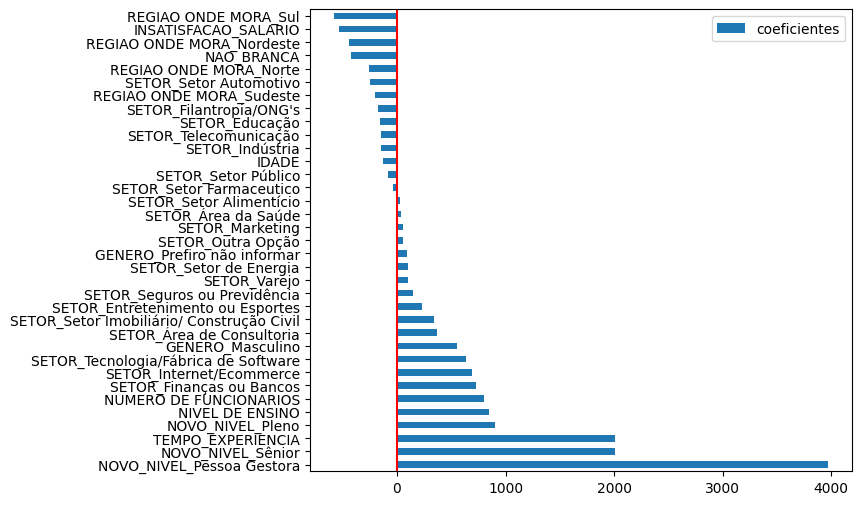

In [52]:
coefs.plot.barh(figsize=(7,6))
plt.axvline(x=0, color='red')

Barras antes do zero, tem peso negativo para predição do salario, diminuindo-o e o contrario também.

O modelo treinado foi utilizado para análise. Buscando entender no mundo real de hoje o que influencia o salário, olhando os coeficientes e o que pesa para negativo e positivo. <br>

Se um modelo para estimar o salário de uma pessoa, para ser usado na vida real, vai ser estimado por um modelo, precisar ter muito cuidado com ética para não reproduzir os vieses do mundo real.